In [2]:
import pandas as pd
import numpy as np


In [3]:
nbaproset = pd.read_csv("nbaprocessed.csv")

In [4]:
print(nbaproset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     16304 non-null  int64  
 1   Year           16304 non-null  int64  
 2   Player         16304 non-null  object 
 3   Tm             16304 non-null  object 
 4   G              16304 non-null  float64
 5   PER            16304 non-null  float64
 6    Salary        16304 non-null  float64
 7   MP             16304 non-null  float64
 8   3P             16304 non-null  float64
 9   2P             16304 non-null  float64
 10  FT             16304 non-null  float64
 11  TRB            16304 non-null  float64
 12  AST            16304 non-null  float64
 13  STL            16304 non-null  float64
 14  BLK            16304 non-null  float64
 15  TOV            16304 non-null  float64
 16  PF             16304 non-null  float64
 17  PTS            16304 non-null  float64
 18  Archet

In [5]:
display(nbaproset)

,Unnamed: 0,Year,Player,Tm,G,PER,Salary,MP,3P,2P,...,Archetype,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,decades_1980s,decades_1990s,decades_2000s,decades_2010s
0,0,1980,Swen Nater,SDC,0.952381,0.548287,0.066278,0.807780,0.000000,0.448980,...,All Star Post Scorer,1,0,0,0,0,1,0,0,0
1,1,1980,Marvin Webster,NYK,0.226190,0.299065,0.028450,0.340961,0.000000,0.155102,...,Post Scorer,1,0,0,0,0,1,0,0,0
2,2,1980,Raymond Townsend,GSW,0.880952,0.311526,0.029843,0.354691,0.027778,0.179592,...,Sharpshooter,0,0,0,0,1,1,0,0,0
3,3,1980,Alonzo Bradley,HOU,0.250000,0.140187,0.011447,0.100686,0.000000,0.057143,...,Ignorance,0,0,0,1,0,1,0,0,0
4,4,1980,Artis Gilmore,CHI,0.559524,0.632399,0.106424,0.748284,0.000000,0.522449,...,All Star Big Man,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16299,16299,2019,Keita Bates-Diop,MIN,0.345238,0.311526,0.029788,0.384439,0.027778,0.130612,...,Post Scorer,0,0,0,1,0,0,0,0,1
16300,16300,2019,Yuta Watanabe,MEM,0.166667,0.115265,0.040762,0.265446,0.027778,0.073469,...,Ignorance,0,0,0,1,0,0,0,0,1
16301,16301,2019,Noah Vonleh,NYK,0.797619,0.445483,0.057755,0.578947,0.027778,0.195918,...,Rim Protector,0,1,0,0,0,0,0,0,1
16302,16302,2019,Džanan Musa,BRK,0.095238,0.193146,0.058142,0.098398,0.027778,0.073469,...,Ignorance,0,0,0,0,1,0,0,0,1


In [6]:
nbaproset.drop(columns = nbaproset.columns[0], axis = 1, inplace = True)

In [7]:
print(nbaproset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           16304 non-null  int64  
 1   Player         16304 non-null  object 
 2   Tm             16304 non-null  object 
 3   G              16304 non-null  float64
 4   PER            16304 non-null  float64
 5    Salary        16304 non-null  float64
 6   MP             16304 non-null  float64
 7   3P             16304 non-null  float64
 8   2P             16304 non-null  float64
 9   FT             16304 non-null  float64
 10  TRB            16304 non-null  float64
 11  AST            16304 non-null  float64
 12  STL            16304 non-null  float64
 13  BLK            16304 non-null  float64
 14  TOV            16304 non-null  float64
 15  PF             16304 non-null  float64
 16  PTS            16304 non-null  float64
 17  Archetype      16304 non-null  object 
 18  Pos_C 

In [8]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [9]:
X = nbaproset.drop( columns = ["Year","Player","Tm","Archetype"], axis = 1)
y = nbaproset[["Archetype"]]

In [10]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   G              16304 non-null  float64
 1   PER            16304 non-null  float64
 2    Salary        16304 non-null  float64
 3   MP             16304 non-null  float64
 4   3P             16304 non-null  float64
 5   2P             16304 non-null  float64
 6   FT             16304 non-null  float64
 7   TRB            16304 non-null  float64
 8   AST            16304 non-null  float64
 9   STL            16304 non-null  float64
 10  BLK            16304 non-null  float64
 11  TOV            16304 non-null  float64
 12  PF             16304 non-null  float64
 13  PTS            16304 non-null  float64
 14  Pos_C          16304 non-null  int64  
 15  Pos_PF         16304 non-null  int64  
 16  Pos_PG         16304 non-null  int64  
 17  Pos_SF         16304 non-null  int64  
 18  Pos_SG

In [11]:
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Archetype  16304 non-null  object
dtypes: object(1)
memory usage: 127.5+ KB
None


In [12]:
print(y.head(10))

              Archetype
0  All Star Post Scorer
1           Post Scorer
2          Sharpshooter
3             Ignorance
4      All Star Big Man
5  All Star Post Scorer
6      All Star Big Man
7             Ignorance
8             Playmaker
9           Post Scorer


In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11412, 23) (4892, 23) (11412, 1) (4892, 1)


In [15]:
dtc = DecisionTreeClassifier()
rfecv = RFECV( estimator = dtc, cv = 10, scoring = "accuracy")
rfecv = rfecv.fit(X_train, y_train)

In [16]:
print(rfecv.n_features_)

11


In [17]:
print(X.columns[rfecv.support_])

Index([' Salary ', 'MP', '3P', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')


In [18]:
print(rfecv.cv_results_)

{'mean_test_score': array([0.4547861 , 0.44812666, 0.56668376, 0.75043867, 0.80871029,
       0.84314862, 0.87802201, 0.88827387, 0.89729943, 0.90457291,
       0.90816579, 0.90772781, 0.90606306, 0.90229505, 0.90474812,
       0.90457314, 0.90474881, 0.907115  , 0.90501166, 0.90693971,
       0.90352174, 0.90404874, 0.90536253]), 'std_test_score': array([0.00933718, 0.0372612 , 0.02418459, 0.01697684, 0.01631348,
       0.01607103, 0.01038826, 0.00734627, 0.00908103, 0.00737295,
       0.00755792, 0.00580091, 0.00705115, 0.00811046, 0.01110314,
       0.00859226, 0.00832949, 0.00589655, 0.00666197, 0.00746969,
       0.00697274, 0.00779739, 0.00821492]), 'split0_test_score': array([0.44570928, 0.44483363, 0.53152364, 0.76707531, 0.79684764,
       0.82224168, 0.882662  , 0.90455342, 0.90805604, 0.91155867,
       0.90630473, 0.90980736, 0.91243433, 0.90805604, 0.9089317 ,
       0.90630473, 0.90105079, 0.90455342, 0.90542907, 0.90718039,
       0.9089317 , 0.90192644, 0.90718039]), 's

In [19]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE
rfe = RFE( estimator = dtc)
rfe = rfe.fit(X_train, y_train)

In [20]:
print(X_train.columns[rfe.support_])

Index([' Salary ', 'MP', '3P', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')


In [21]:
bfe = SFS( estimator = dtc, cv = 10, n_features_to_select = "auto" , direction = "backward", tol = -0.01,  scoring = "accuracy")
bfe = bfe.fit(X_train, y_train)
ffs = SFS( estimator = dtc, cv = 10, n_features_to_select = "auto" , direction = "forward", tol = 0.01, scoring = "accuracy")
ffs = ffs.fit(X_train, y_train)

In [22]:
print(X_train.columns[bfe.support_])

Index(['3P', 'TRB', 'AST', 'STL', 'BLK', 'PF', 'PTS'], dtype='object')


In [23]:
print(X_train.columns[ffs.support_])

Index([' Salary ', 'MP', '3P', 'AST', 'STL', 'BLK', 'PF', 'PTS'], dtype='object')


<AxesSubplot:>

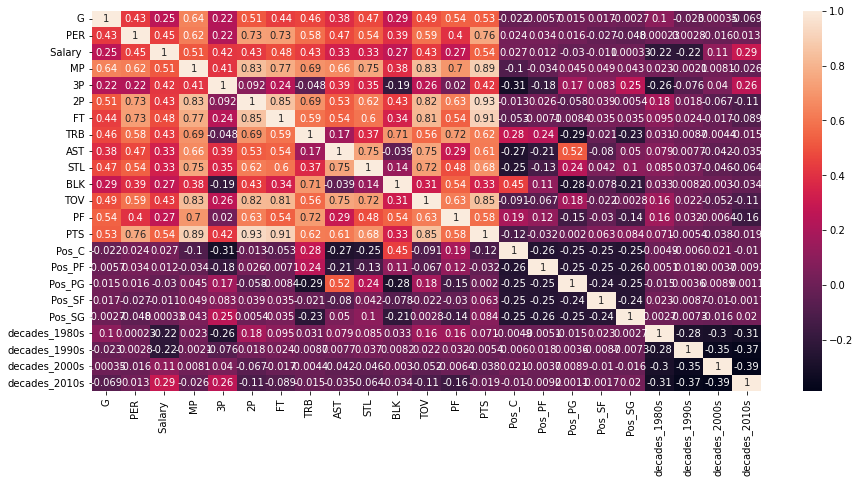

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
hh = X.corr()
plt.figure(figsize = (15,7))
sns.heatmap(hh, annot = True)